In [2]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
#loading the data into jupyter notebook
irisdata = pd.read_csv(r"C:\Users\JADESOLA\Documents\AI\HASH\Data sets\iris.csv")

In [4]:
#Giving names to the columns in the data
headers = [ "SepalLengthCm", "SepalWidthCm","PetalLenghtCm", "PetalWidthCm","Species"]
irisdata.columns = headers

In [5]:
irisdata

,SepalLengthCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [6]:
#checking for any null values in the data
irisdata.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLenghtCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
#checking the data type of each column
irisdata.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLenghtCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
#getting a mathematical description of every column
irisdata.describe()

,SepalLengthCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


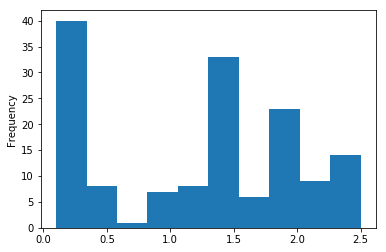

In [9]:
#visualizing the petalwidth
irisdata["PetalWidthCm"].plot.hist()
plt.show()

C:\Users\JADESOLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


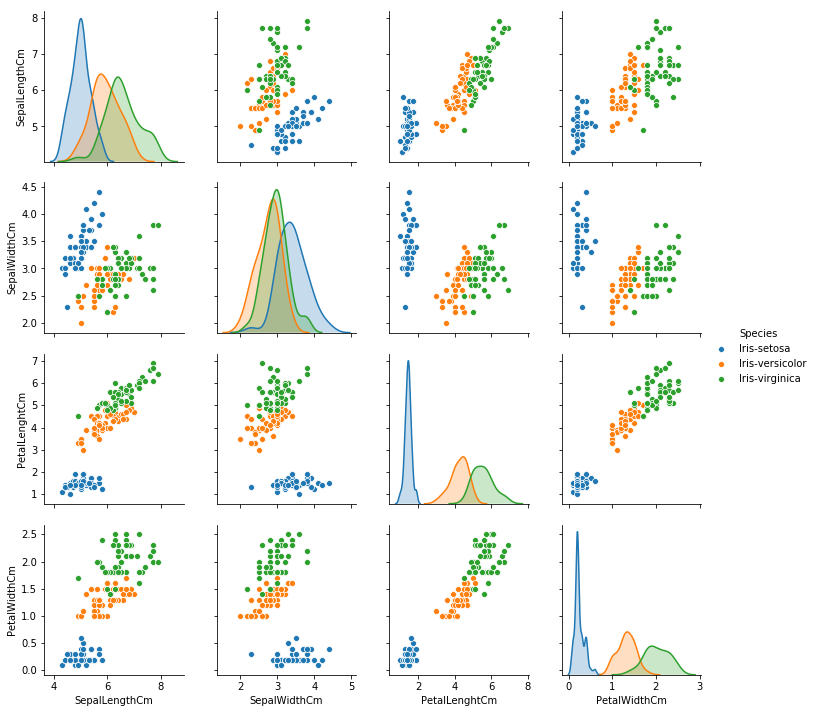

In [10]:
#visualizing each feature against eachother 
sns.pairplot (irisdata, hue = "Species")

In [14]:
#spliting the data into train and test data
all_inputs = irisdata[["SepalLengthCm", "SepalWidthCm","PetalLenghtCm", "PetalWidthCm"]].values
all_classes = irisdata["Species"].values
(X_train, X_test, y_train, y_test)= train_test_split(all_inputs, all_classes ,train_size=0.7, random_state = 1)

C:\Users\JADESOLA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
#using decision tree classifier to train the data
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [17]:
#showing the prediction
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [18]:
#testing for the accuracy of the model
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

